In [1]:
import numpy as np
import re
import pandas as pd
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/' 

In [2]:
df_neg = pd.read_csv('negative.csv', delimiter=';',header=None )
df_pos = pd.read_csv('positive.csv', delimiter=';',header=None )

In [3]:
df_neg.columns = ['id','tdate','tmane','ttext','ttype','trep','trtw','tfav','tstcount','tfol','tfrien','listcount']
df_pos.columns = ['id','tdate','tmane','ttext','ttype','trep','trtw','tfav','tstcount','tfol','tfrien','listcount']

In [4]:
df_neg.head()

,id,tdate,tmane,ttext,ttype,trep,trtw,tfav,tstcount,tfol,tfrien,listcount
0,408906762813579264,1386325944,dugarchikbellko,на работе был полный пиддес :| и так каждое за...,-1,0,0,0,8064,111,94,2
1,408906818262687744,1386325957,nugemycejela,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1,0,0,0,26,42,39,0
2,408906858515398656,1386325966,4post21,@elina_4post как говорят обещаного три года жд...,-1,0,0,0,718,49,249,0
3,408906914437685248,1386325980,Poliwake,"Желаю хорошего полёта и удачной посадки,я буду...",-1,0,0,0,10628,207,200,0
4,408906914723295232,1386325980,capyvixowe,"Обновил за каким-то лешим surf, теперь не рабо...",-1,0,0,0,35,17,34,0


In [5]:
df_pos.head()

,id,tdate,tmane,ttext,ttype,trep,trtw,tfav,tstcount,tfol,tfrien,listcount
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1


In [6]:
df =pd.concat((df_pos, df_neg), axis=0)

In [7]:
y =df.ttype

In [8]:
del df['ttype']

In [9]:
df.drop(['id', 'tdate'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226834 entries, 0 to 111922
Data columns (total 11 columns):
id           226834 non-null int64
tdate        226834 non-null int64
tmane        226834 non-null object
ttext        226834 non-null object
trep         226834 non-null int64
trtw         226834 non-null int64
tfav         226834 non-null int64
tstcount     226834 non-null int64
tfol         226834 non-null int64
tfrien       226834 non-null int64
listcount    226834 non-null int64
dtypes: int64(9), object(2)
memory usage: 20.8+ MB


In [11]:
df.tmane.nunique()

139658

In [12]:
df.drop(['tmane'], inplace=True)

In [13]:
import matplotlib
import seaborn as sns

In [14]:
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    df);
sns_plot.savefig('pairplot.png')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [16]:
y_tr, y_val, x_tr,  x_val = train_test_split(y, df, test_size=0.2, random_state=42 )

In [17]:
text = df.ttext

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
from nltk.corpus import stopwords

In [20]:
stopwords.words('russian')[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [393]:
re_positive= re.compile('([\:;]*\-*[\)]+)|([\)D\*]+\-*\:)|(\^\_\^)|(\:\-*[d\*])', re.IGNORECASE)
re_negative = re.compile('(\:*\-*[(]+)|([\)D]+\-*\:)|(\:-*\|)|(\:\-\/)', re.IGNORECASE)
re_voscl =  re.compile('\!+')
re_users = re.compile('(@[\w\_]+)')
re_newline = re.compile('[\n\r]')


In [394]:
def preProcess(s):
    s= re_newline.sub(' ', s)
    s= re_users.sub(' $USER$ ', s)    
    s= re_positive.sub(' $POSITIVE$ ', s)
    s= re_negative.sub(' $NEGATIVE$ ', s)
    s= re_voscl.sub(' ! ', s)

    return s.lower()

In [395]:
preProcess('http://t.co/xKz4sWm7RA Так вот ты какая, неведомая еб*ная ху*ня...о_О')

'http://t.co/xkz4swm7ra так вот ты какая, неведомая еб*ная ху*ня...о_о'

In [396]:
#list(filter(None,re.split('([^а-яА-Я\s]+)|\s+', s)) )

In [397]:
countvec = CountVectorizer(min_df=5, stop_words=stopwords.words('russian'),
                           preprocessor= preProcess,
                           tokenizer=lambda s: list(filter(None,re.split('([^а-яА-Я\s\d]+)|[\s+\.\!]', s))) ,
#                           token_pattern='(?u)\\b[\\w\\$\\!]{2,}\\b',
                           
                          )

In [398]:
countvec.fit(df.ttext)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1),
        preprocessor=<function preProcess at 0x0000000043A6C840>,
        stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', '...гда', 'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда', 'конечно', 'всю', 'между'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function <lambda> at 0x0000000049ADC730>,
        vocabulary=None)

In [399]:
data = countvec.transform(df.ttext)

In [400]:
from sklearn.tree import DecisionTreeClassifier

In [401]:
tree = DecisionTreeClassifier(max_depth=3,  min_samples_leaf=10)

In [402]:
from sklearn.model_selection import cross_val_score

In [403]:
res = cross_val_score(tree, data, y, cv = 5, scoring='accuracy')

In [404]:
res

array([ 0.99993387,  0.99997796,  0.99995592,  0.99993387,  0.99995591])

In [405]:
np.mean(res)

0.99995150640734987

In [406]:
import graphviz
import codecs
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/' 

In [407]:
tree.fit(data,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [408]:
np.sort(tree.feature_importances_)[::-1][:10]

array([  9.98568579e-01,   1.42785684e-03,   1.55151005e-06,
         1.35648502e-06,   5.32258844e-07,   1.24070813e-07,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00])

In [439]:
featureimp = np.vstack((np.array(countvec.get_feature_names())[np.argsort(tree.feature_importances_)[::-1][:10]],
                        np.sort(tree.feature_importances_)[::-1][:10]))

In [442]:
featureimp.shape

(2, 10)

In [440]:
featureimp.T

array([['$positive$', '0.9985685788347208'],
       ['$negative$', '0.0014278568405574016'],
       ['!', '1.551510047432181e-06'],
       ['обнимаю', '1.3564850170203055e-06'],
       ['испугалась', '5.322588436725784e-07'],
       ['бабушка', '1.2407081349939655e-07'],
       ['извиняйте', '0.0'],
       ['идилию', '0.0'],
       ['идеала', '0.0'],
       ['идеале', '0.0']],
      dtype='<U34')

In [410]:
pred = tree.predict(data)

In [411]:
check = np.vstack((df.ttext,y,pred) )

In [412]:
check[:,0]

array([ '@first_timee хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа)',
       1, 1], dtype=object)

In [413]:
import pandas as pd

In [414]:
check = pd.DataFrame(check.T, columns=['text', 'y', 'pred'])

In [415]:
check.head()

,text,y,pred
0,"@first_timee хоть я и школота, но поверь, у на...",1,1
1,"Да, все-таки он немного похож на него. Но мой ...",1,1
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,1
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,1
4,@irina_dyshkant Вот что значит страшилка :D\nН...,1,1


In [429]:
check.loc[check.y!=check.pred].head(20)

,text,y,pred
18236,RT @vasiliy_org: Это скандал! :))) На Съезде в...,1,-1
72611,@anieverthen бабушка,1,-1
111420,#ПредновогодниеОбнимашки для @ForgiveMeMan Инц...,1,-1
121703,@Simonenko_OS я тоже тебе это обещаю Заичка:-...,-1,1
122373,"RT @vadelrigh65: Мда, я, реально, испугалась, ...",-1,1
142134,Надоело притворяться что это не так o_O строю ...,-1,1
161595,@ushikovaa @victoria75132 о_О тот самый сок? :-D,-1,1
166836,"""@MedvedOfRussia: Закон выборов в Роиссе. http...",-1,1
186326,"@verunO_o спасибо,девочка моя!всего самого хор...",-1,1
197699,Кто умеет фотошопить? Научите миня :сссс Или х...,-1,1


In [417]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    return  export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names)

In [418]:
get_tree_dot_view(tree, countvec.get_feature_names(), ['neg', 'pos'])

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="$positive$ <= 0.5\\ngini = 0.4999\\nsamples = 226834\\nvalue = [111923, 114911]\\nclass = pos", fillcolor="#399de507"] ;\n1 [label="обнимаю <= 0.5\\ngini = 0.0\\nsamples = 111835\\nvalue = [111833, 2]\\nclass = neg", fillcolor="#e58139ff"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="бабушка <= 0.5\\ngini = 0.0\\nsamples = 111822\\nvalue = [111821, 1]\\nclass = neg", fillcolor="#e58139ff"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 111680\\nvalue = [111680, 0]\\nclass = neg", fillcolor="#e58139ff"] ;\n2 -> 3 ;\n4 [label="gini = 0.014\\nsamples = 142\\nvalue = [141, 1]\\nclass = neg", fillcolor="#e58139fd"] ;\n2 -> 4 ;\n5 [label="gini = 0.142\\nsamples = 13\\nvalue = [12, 1]\\nclass = neg", fillcolor="#e58139ea"] ;\n1 -> 5 ;\n6 [label="$negative$ <= 0.5\\ngini = 0.0016\\nsamples = 114999\\nvalue = [90, 114909]\\nclass = pos", fillcolor="#399de5ff"] ;\n0 -> 6 [labeldistance=2.5

In [419]:
import matplotlib

In [420]:
%matplotlib inline

In [421]:
graph = graphviz.Source(get_tree_dot_view(tree, countvec.get_feature_names(), ['neg', 'pos']))  

In [422]:
graph.render('tree')

'tree.pdf'

In [423]:
from IPython.display import display

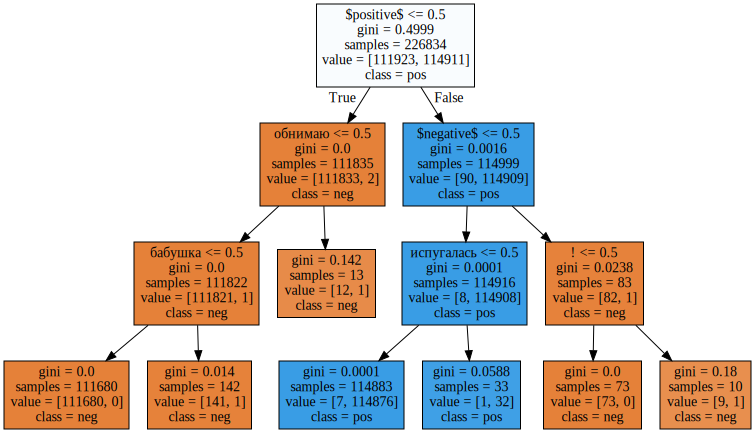

In [424]:
display(graph)